# CANCER DATASET

In [279]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


In [280]:
# loading into python
data = pd.read_csv('C:/Users/Lenovo/NORKA/06th jan 2023/DATA/cancer_dataset.csv')

In [281]:
# Print information about the dataframe 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

~diagnosis is a categorical column


### CHECKING FOR NULL VALUES

In [282]:
# number of null values in the dataframe 'data'
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

~ There are 569 rows and 'Unnamed: 32' column is having 569 null values

In [283]:
# display the first 5 rows of the dataframe
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### CHECKING FOR DUPLICATES

In [284]:
# display the rows having duplicates 
data[data.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


~ no duplicates found

In [285]:
# count of unique values
data['id'].nunique()

569

~ remove 'Unnamed: 32' column since it is having 569 null values

~ remove 'id' column since it is having 569 unique values and there are only 569 rows present in the dataframe, hence each row in that particular column is containing a unique value. It cannot contribute to the machine learning model.

In [286]:
# removing 'Unnamed: 32', 'id' columns
data = data.drop(['Unnamed: 32', 'id'], axis = 1)

In [287]:
# count of rows and columns
data.shape

(569, 31)

In [288]:
# displaying column names
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### CHECKING FOR OUTLIERS 

##### 'Outliers' in 'radius_mean' column

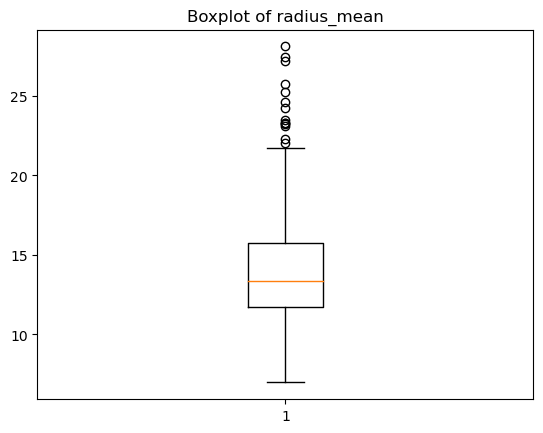

In [289]:
# Boxplot of 'radius_mean' column to check outliers
plt.boxplot(data['radius_mean'])

# display title
plt.title("Boxplot of radius_mean")

# display figures
plt.show()

In [290]:
# First Quartile of 'radius_mean' column
Q1_rm = np.percentile(data['radius_mean'], 25, interpolation='midpoint')
f"First Quartile of 'radius_mean' column = {Q1_rm}"


"First Quartile of 'radius_mean' column = 11.7"

In [291]:
# Second Quartile of 'radius_mean' column
Q2_rm = np.percentile(data['radius_mean'], 50, interpolation='midpoint')
f"Second Quartile of 'radius_mean' column = {Q2_rm}"

"Second Quartile of 'radius_mean' column = 13.37"

In [292]:
# Third Quartile of 'radius_mean' column
Q3_rm = np.percentile(data['radius_mean'], 75, interpolation='midpoint')
f"Third Quartile of 'radius_mean' column = {Q3_rm}"

"Third Quartile of 'radius_mean' column = 15.78"

In [293]:
# (interquartile range) IQR of  'radius_mean' column
IQR_rm = Q3_rm-Q1_rm
f"IQR of 'radius_mean' column = {IQR_rm}"

"IQR of 'radius_mean' column = 4.08"

In [294]:
# lower whisker of 'radius_mean'  column
low_rm = Q1_rm-1.5*IQR_rm 
f"lower whisker of 'radius_mean'  column = {low_rm}"

"lower whisker of 'radius_mean'  column = 5.579999999999999"

In [295]:
# upper whisker of 'radius_mean' column
up_rm = Q3_rm+1.5*IQR_rm
f"upper whisker of 'radius_mean' column = {up_rm}"

"upper whisker of 'radius_mean' column = 21.9"

In [296]:
# to find the outliers  in 'radius_mean' column and display it
outlier_rm = [] 
for x_rm in data['radius_mean']:
    if((x_rm>up_rm) or (x_rm<low_rm)):
        outlier_rm.append(x_rm)
f"Outliers of 'radius_mean' column = {outlier_rm}"


"Outliers of 'radius_mean' column = [25.22, 22.27, 24.25, 23.27, 27.22, 23.29, 28.11, 23.21, 23.51, 25.73, 22.01, 27.42, 23.09, 24.63]"

##### 'Outliers' in 'texture_mean' column

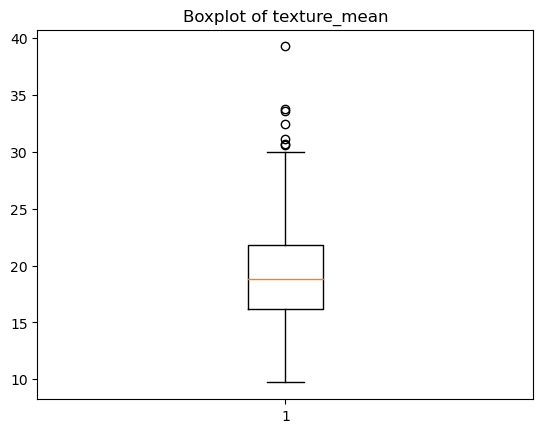

In [297]:
# Boxplot of 'texture_mean' column to check outliers
plt.boxplot(data['texture_mean'])

# display title
plt.title("Boxplot of texture_mean")

# display figures
plt.show()

In [298]:
# First Quartile of 'texture_mean' column
Q1_tm = np.percentile(data['texture_mean'], 25, interpolation='midpoint')
f"First Quartile of 'texture_mean' column = {Q1_tm}"

"First Quartile of 'texture_mean' column = 16.17"

In [299]:
# Second Quartile of 'texture_mean' column
Q2_tm = np.percentile(data['texture_mean'], 50, interpolation='midpoint')
f"Second Quartile of 'texture_mean' column = {Q2_tm}"

"Second Quartile of 'texture_mean' column = 18.84"

In [300]:
# Third Quartile of 'texture_mean' column
Q3_tm = np.percentile(data['texture_mean'], 75, interpolation='midpoint')
f"Third Quartile of 'texture_mean' column = {Q3_tm}"

"Third Quartile of 'texture_mean' column = 21.8"

In [301]:
# (interquartile range) IQR of  'texture_mean' column
IQR_tm = Q3_tm-Q1_tm
f"IQR of 'texture_mean' column = {IQR_tm}"

"IQR of 'texture_mean' column = 5.629999999999999"

In [302]:
# lower whisker of 'texture_mean'  column
low_tm = Q1_tm-1.5*IQR_tm 
f"lower whisker of 'texture_mean'  column = {low_tm}"

"lower whisker of 'texture_mean'  column = 7.725000000000003"

In [303]:
# upper whisker of 'texture_mean' column
up_tm = Q3_tm+1.5*IQR_tm
f"upper whisker of 'texture_mean' column = {up_tm}"

"upper whisker of 'texture_mean' column = 30.244999999999997"

In [304]:
# to find the outliers  in 'texture_mean' column and display it
outlier_tm = [] 
for x_tm in data['texture_mean']:
    if((x_tm>up_tm) or (x_tm<low_tm)):
        outlier_tm.append(x_tm)
f"Outliers of 'texture_mean' column = {outlier_tm}"


"Outliers of 'texture_mean' column = [32.47, 33.81, 39.28, 33.56, 31.12, 30.72, 30.62]"

##### 'Outliers' in 'perimeter_mean' column

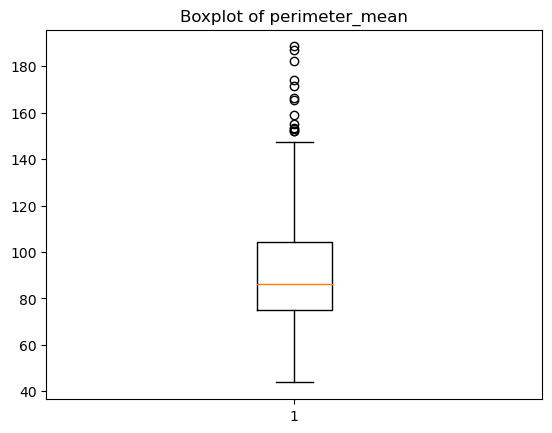

In [305]:
# Boxplot of 'perimeter_mean' column to check outliers
plt.boxplot(data['perimeter_mean'])

# display title
plt.title("Boxplot of perimeter_mean")

# display figures
plt.show()

In [306]:
# First Quartile of 'perimeter_mean' column
Q1_pm = np.percentile(data['perimeter_mean'], 25, interpolation='midpoint')
f"First Quartile of 'perimeter_mean' column = {Q1_pm}"

"First Quartile of 'perimeter_mean' column = 75.17"

In [307]:
# Second Quartile of 'perimeter_mean' column
Q2_pm = np.percentile(data['perimeter_mean'], 50, interpolation='midpoint')
f"Second Quartile of 'perimeter_mean' column = {Q2_pm}"

"Second Quartile of 'perimeter_mean' column = 86.24"

In [308]:
# Third Quartile of 'perimeter_mean' column
Q3_pm = np.percentile(data['perimeter_mean'], 75, interpolation='midpoint')
f"Third Quartile of 'perimeter_mean' column = {Q3_pm}"

"Third Quartile of 'perimeter_mean' column = 104.1"

In [309]:
# (interquartile range) IQR of  'perimeter_mean' column
IQR_pm = Q3_pm-Q1_pm
f"IQR of 'perimeter_mean' column = {IQR_pm}"

"IQR of 'perimeter_mean' column = 28.929999999999993"

In [310]:
# lower whisker of 'perimeter_mean'  column
low_pm = Q1_pm-1.5*IQR_pm 
f"lower whisker of 'perimeter_mean'  column = {low_pm}"

"lower whisker of 'perimeter_mean'  column = 31.775000000000013"

In [311]:
# upper whisker of 'perimeter_mean' column
up_pm = Q3_pm+1.5*IQR_pm
f"upper whisker of 'perimeter_mean' column = {up_pm}"

"upper whisker of 'perimeter_mean' column = 147.49499999999998"

In [312]:
# to find the outliers  in 'perimeter_mean' column and display it
outlier_pm = [] 
for x_pm in data['perimeter_mean']:
    if((x_pm>up_pm) or (x_pm<low_pm)):
        outlier_pm.append(x_pm)
f"Outliers of 'perimeter_mean' column = {outlier_pm}"

"Outliers of 'perimeter_mean' column = [171.5, 152.8, 166.2, 152.1, 182.1, 158.9, 188.5, 153.5, 155.1, 174.2, 186.9, 152.1, 165.5]"

##### 'Outliers' in 'area_mean' column

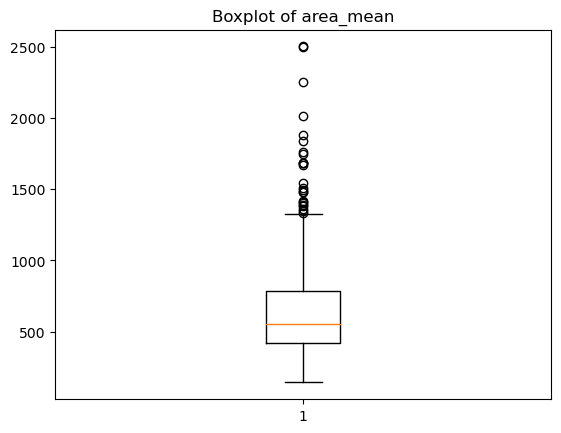

In [313]:
# Boxplot of 'area_mean' column to check outliers
plt.boxplot(data['area_mean'])

# display title
plt.title("Boxplot of area_mean")

# display figures
plt.show()

In [314]:
# First Quartile of 'area_mean' column
Q1_am = np.percentile(data['area_mean'], 25, interpolation='midpoint')
f"First Quartile of 'area_mean' column = {Q1_am}"

"First Quartile of 'area_mean' column = 420.3"

In [315]:
# Second Quartile of 'area_mean' column
Q2_am = np.percentile(data['area_mean'], 50, interpolation='midpoint')
f"Second Quartile of 'area_mean' column = {Q2_am}"

"Second Quartile of 'area_mean' column = 551.1"

In [316]:
# Third Quartile of 'area_mean' column
Q3_am = np.percentile(data['area_mean'], 75, interpolation='midpoint')
f"Third Quartile of 'area_mean' column = {Q3_am}"

"Third Quartile of 'area_mean' column = 782.7"

In [317]:
# (interquartile range) IQR of  'area_mean' column
IQR_am = Q3_am-Q1_am
f"IQR of 'area_mean' column = {IQR_am}"

"IQR of 'area_mean' column = 362.40000000000003"

In [318]:
# lower whisker of 'area_mean'  column
low_am = Q1_am-1.5*IQR_am 
f"lower whisker of 'area_mean'  column = {low_am}"

"lower whisker of 'area_mean'  column = -123.30000000000001"

In [319]:
# upper whisker of 'area_mean' column
up_am = Q3_am+1.5*IQR_am
f"upper whisker of 'area_mean' column = {up_am}"

"upper whisker of 'area_mean' column = 1326.3000000000002"

In [320]:
# to find the outliers  in 'area_mean' column and display it
outlier_am = [] 
for x_am in data['area_mean']:
    if((x_am>up_am) or (x_am<low_am)):
        outlier_am.append(x_am)
f"Outliers of 'area_mean' column = {outlier_am}"

"Outliers of 'area_mean' column = [1404.0, 1878.0, 1509.0, 1761.0, 1686.0, 2250.0, 1685.0, 2499.0, 1670.0, 1364.0, 1419.0, 1491.0, 1747.0, 2010.0, 1546.0, 1482.0, 1386.0, 1335.0, 1407.0, 1384.0, 2501.0, 1682.0, 1841.0, 1347.0, 1479.0]"

##### 'Outliers' in 'smoothness_mean' column

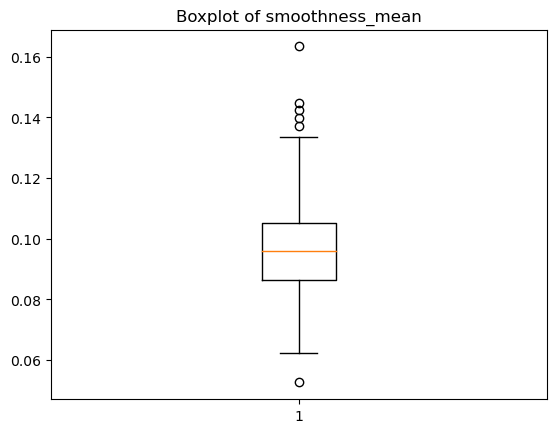

In [321]:
# Boxplot of 'smoothness_mean' column to check outliers
plt.boxplot(data['smoothness_mean'])

# display title
plt.title("Boxplot of smoothness_mean")

# display figures
plt.show()

In [322]:
# First Quartile of 'smoothness_mean' column
Q1_sm = np.percentile(data['smoothness_mean'], 25, interpolation='midpoint')
f"First Quartile of 'smoothness_mean' column = {Q1_sm}"

"First Quartile of 'smoothness_mean' column = 0.08637"

In [323]:
# Second Quartile of 'smoothness_mean' column
Q2_sm = np.percentile(data['smoothness_mean'], 50, interpolation='midpoint')
f"Second Quartile of 'smoothness_mean' column = {Q2_sm}"

"Second Quartile of 'smoothness_mean' column = 0.09587"

In [324]:
# Third Quartile of 'smoothness_mean' column
Q3_sm = np.percentile(data['smoothness_mean'], 75, interpolation='midpoint')
f"Third Quartile of 'smoothness_mean' column = {Q3_sm}"

"Third Quartile of 'smoothness_mean' column = 0.1053"

In [325]:
# (interquartile range) IQR of  'smoothness_mean' column
IQR_sm = Q3_sm-Q1_sm
f"IQR of 'smoothness_mean' column = {IQR_sm}"

"IQR of 'smoothness_mean' column = 0.018930000000000002"

In [326]:
# lower whisker of 'smoothness_mean'  column
low_sm = Q1_sm-1.5*IQR_sm 
f"lower whisker of 'smoothness_mean'  column = {low_sm}"

"lower whisker of 'smoothness_mean'  column = 0.057975"

In [327]:
# upper whisker of 'smoothness_mean' column
up_sm = Q3_sm+1.5*IQR_sm
f"upper whisker of 'smoothness_mean' column = {up_sm}"

"upper whisker of 'smoothness_mean' column = 0.133695"

In [328]:
# to find the outliers  in 'smoothness_mean' column and display it
outlier_sm = [] 
for x_sm in data['smoothness_mean']:
    if((x_sm>up_sm) or (x_sm<low_sm)):
        outlier_sm.append(x_sm)
f"Outliers of 'smoothness_mean' column = {outlier_sm}"

"Outliers of 'smoothness_mean' column = [0.1425, 0.1398, 0.1447, 0.1634, 0.1371, 0.05263]"

##### 'Outliers' in 'compactness_mean' column

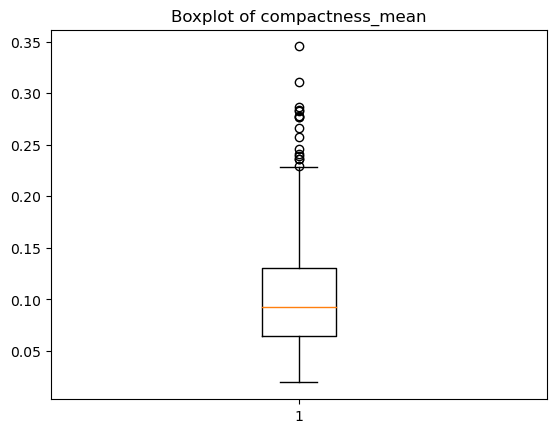

In [329]:
# Boxplot of 'compactness_mean' column to check outliers
plt.boxplot(data['compactness_mean'])

# display title
plt.title("Boxplot of compactness_mean")

# display figures
plt.show()

In [330]:
# First Quartile of 'compactness_mean' column
Q1_cm = np.percentile(data['compactness_mean'], 25, interpolation='midpoint')
f"First Quartile of 'compactness_mean' column = {Q1_cm}"

"First Quartile of 'compactness_mean' column = 0.06492"

In [331]:
# Second Quartile of 'compactness_mean' column
Q2_cm = np.percentile(data['compactness_mean'], 50, interpolation='midpoint')
f"Second Quartile of 'compactness_mean' column = {Q2_cm}"

"Second Quartile of 'compactness_mean' column = 0.09263"

In [332]:
# Third Quartile of 'compactness_mean' column
Q3_cm = np.percentile(data['compactness_mean'], 75, interpolation='midpoint')
f"Third Quartile of 'compactness_mean' column = {Q3_cm}"

"Third Quartile of 'compactness_mean' column = 0.1304"

In [333]:
# (interquartile range) IQR of  'compactness_mean' column
IQR_cm = Q3_cm-Q1_cm
f"IQR of 'compactness_mean' column = {IQR_cm}"

"IQR of 'compactness_mean' column = 0.06547999999999998"

In [334]:
# lower whisker of 'compactness_mean'  column
low_cm = Q1_cm-1.5*IQR_cm 
f"lower whisker of 'compactness_mean'  column = {low_cm}"

"lower whisker of 'compactness_mean'  column = -0.03329999999999997"

In [335]:
# upper whisker of 'compactness_mean' column
up_cm = Q3_cm+1.5*IQR_cm
f"upper whisker of 'compactness_mean' column = {up_cm}"

"upper whisker of 'compactness_mean' column = 0.22861999999999996"

In [336]:
# to find the outliers  in 'compactness_mean' column and display it
outlier_cm = [] 
for x_cm in data['compactness_mean']:
    if((x_cm>up_cm) or (x_cm<low_cm)):
        outlier_cm.append(x_cm)
f"Outliers of 'compactness_mean' column = {outlier_cm}"

"Outliers of 'compactness_mean' column = [0.2776, 0.2839, 0.2396, 0.2458, 0.2293, 0.3454, 0.2665, 0.2768, 0.2867, 0.2832, 0.2413, 0.3114, 0.2364, 0.2363, 0.2576, 0.277]"

##### 'Outliers' in  'concavity_mean' column

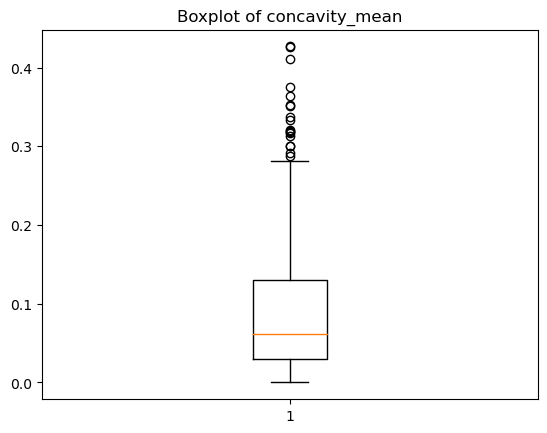

In [337]:
# Boxplot of 'concavity_mean' column to check outliers
plt.boxplot(data['concavity_mean'])

# display title
plt.title("Boxplot of concavity_mean")

# display figures
plt.show()

In [338]:
# First Quartile of 'concavity_mean' column
Q1_cmm = np.percentile(data['concavity_mean'], 25, interpolation='midpoint')
# Second Quartile of 'concavity_mean' column
Q2_cmm = np.percentile(data['concavity_mean'], 50, interpolation='midpoint')
# Third Quartile of 'concavity_mean' column
Q3_cmm = np.percentile(data['concavity_mean'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'concavity_mean' column
IQR_cmm = Q3_cmm-Q1_cmm
# lower whisker of 'concavity_mean'  column
low_cmm = Q1_cmm-1.5*IQR_cmm 
# upper whisker of 'concavity_mean' column
up_cmm = Q3_cmm+1.5*IQR_cmm

# to find the outliers  in 'concavity_mean' column and display it
outlier_cmm = [] 
for x_cmm in data['concavity_mean']:
    if((x_cmm>up_cmm) or (x_cmm<low_cmm)):
        outlier_cmm.append(x_cmm)
f"Outliers of 'concavity_mean' column = {outlier_cmm}"


"Outliers of 'concavity_mean' column = [0.3001, 0.313, 0.3754, 0.3339, 0.4264, 0.3003, 0.4268, 0.4108, 0.2871, 0.3523, 0.3201, 0.3176, 0.2914, 0.3368, 0.3189, 0.3635, 0.3174, 0.3514]"

##### 'Outliers' in 'concave points_mean' column

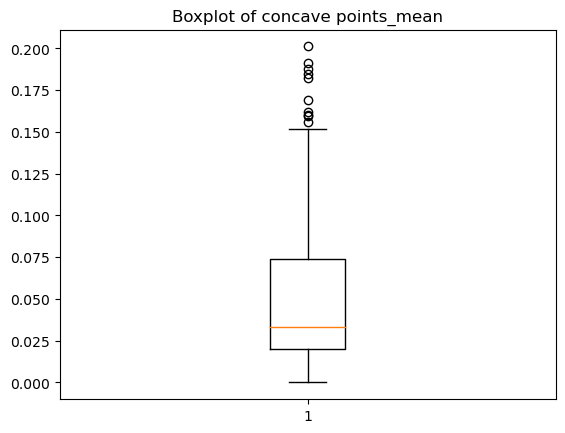

In [339]:
# Boxplot of 'concave points_mean' column to check outliers
plt.boxplot(data['concave points_mean'])

# display title
plt.title("Boxplot of concave points_mean")

# display figures
plt.show()

In [340]:
# First Quartile of 'concave points_mean' column
Q1_cpm = np.percentile(data['concave points_mean'], 25, interpolation='midpoint')
# Second Quartile of 'concave points_mean' column
Q2_cpm = np.percentile(data['concave points_mean'], 50, interpolation='midpoint')
# Third Quartile of 'concave points_mean' column
Q3_cpm = np.percentile(data['concave points_mean'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'concave points_mean' column
IQR_cpm = Q3_cpm-Q1_cpm
# lower whisker of 'concave points_mean'  column
low_cpm = Q1_cpm-1.5*IQR_cpm 
# upper whisker of 'concave points_mean' column
up_cpm = Q3_cpm+1.5*IQR_cpm

# to find the outliers  in 'concave points_mean' column and display it
outlier_cpm = [] 
for x_cpm in data['concave points_mean']:
    if((x_cpm>up_cpm) or (x_cpm<low_cpm)):
        outlier_cpm.append(x_cpm)
f"Outliers of 'concave points_mean' column = {outlier_cpm}"


"Outliers of 'concave points_mean' column = [0.1604, 0.1845, 0.1823, 0.2012, 0.1878, 0.162, 0.1595, 0.1913, 0.1562, 0.1689]"

##### 'Outliers' in 'symmetry_mean' column

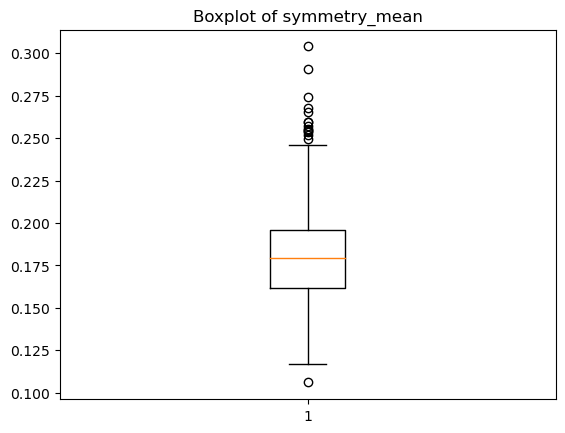

In [341]:
# Boxplot of 'symmetry_mean' column to check outliers
plt.boxplot(data['symmetry_mean'])

# display title
plt.title("Boxplot of symmetry_mean")

# display figures
plt.show()

In [342]:
# First Quartile of 'symmetry_mean' column
Q1_sm1 = np.percentile(data['symmetry_mean'], 25, interpolation='midpoint')
# Second Quartile of 'symmetry_mean' column
Q2_sm1 = np.percentile(data['symmetry_mean'], 50, interpolation='midpoint')
# Third Quartile of 'symmetry_mean' column
Q3_sm1 = np.percentile(data['symmetry_mean'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'symmetry_mean' column
IQR_sm1 = Q3_sm1-Q1_sm1
# lower whisker of 'symmetry_mean'  column
low_sm1 = Q1_sm1-1.5*IQR_sm1 
# upper whisker of 'symmetry_mean' column
up_sm1 = Q3_sm1+1.5*IQR_sm1

# to find the outliers  in 'symmetry_mean' column and display it
outlier_sm1 = [] 
for x_sm1 in data['symmetry_mean']:
    if((x_sm1>up_sm1) or (x_sm1<low_sm1)):
        outlier_sm1.append(x_sm1)
f"Outliers of 'symmetry_mean' column = {outlier_sm1}"


"Outliers of 'symmetry_mean' column = [0.2597, 0.2521, 0.304, 0.2743, 0.2906, 0.2556, 0.2655, 0.2678, 0.254, 0.2548, 0.2495, 0.2595, 0.2569, 0.2538, 0.106]"

##### 'Outliers' in 'fractal_dimension_mean' column

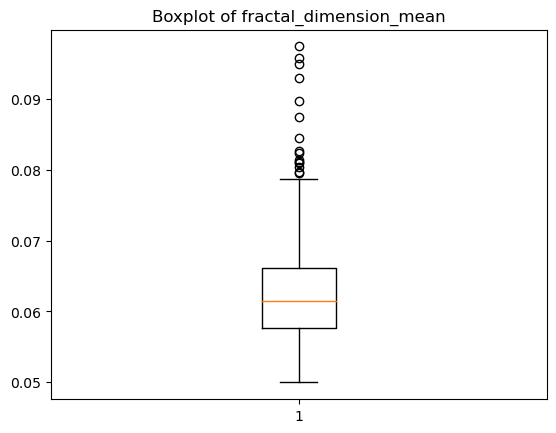

In [343]:
# Boxplot of 'fractal_dimension_mean' column to check outliers
plt.boxplot(data['fractal_dimension_mean'])

# display title
plt.title("Boxplot of fractal_dimension_mean")

# display figures
plt.show()

In [344]:
# First Quartile of 'fractal_dimension_mean' column
Q1_fdm = np.percentile(data['fractal_dimension_mean'], 25, interpolation='midpoint')
# Second Quartile of 'fractal_dimension_mean' column
Q2_fdm = np.percentile(data['fractal_dimension_mean'], 50, interpolation='midpoint')
# Third Quartile of 'fractal_dimension_mean' column
Q3_fdm = np.percentile(data['fractal_dimension_mean'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'fractal_dimension_mean' column
IQR_fdm = Q3_fdm-Q1_fdm
# lower whisker of 'fractal_dimension_mean'  column
low_fdm = Q1_fdm-1.5*IQR_fdm 
# upper whisker of 'fractal_dimension_mean' column
up_fdm = Q3_fdm+1.5*IQR_fdm

# to find the outliers  in 'fractal_dimension_mean' column and display it
outlier_fdm = [] 
for x_fdm in data['fractal_dimension_mean']:
    if((x_fdm>up_fdm) or (x_fdm<low_fdm)):
        outlier_fdm.append(x_fdm)
f"Outliers of 'fractal_dimension_mean' column = {outlier_fdm}"


"Outliers of 'fractal_dimension_mean' column = [0.09744, 0.08243, 0.08046, 0.0898, 0.08142, 0.08261, 0.09296, 0.08116, 0.08104, 0.08743, 0.0845, 0.0795, 0.09502, 0.09575, 0.07976]"

##### 'Outliers' in 'radius_se' column

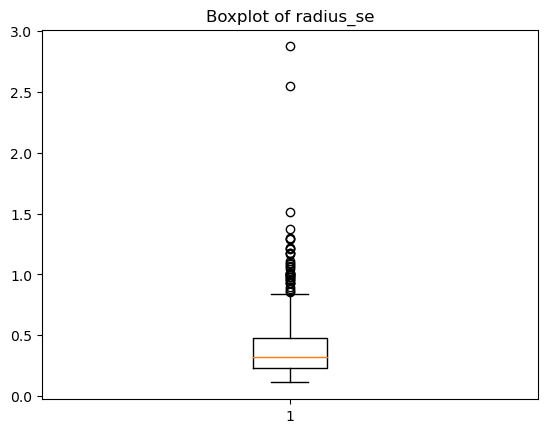

In [345]:
# Boxplot of 'radius_se'  column to check outliers
plt.boxplot(data['radius_se'])

# display title
plt.title("Boxplot of radius_se")

# display figures
plt.show()

In [346]:
# First Quartile of 'radius_se' column
Q1_rs = np.percentile(data['radius_se'], 25, interpolation='midpoint')
# Second Quartile of 'radius_se' column
Q2_rs = np.percentile(data['radius_se'], 50, interpolation='midpoint')
# Third Quartile of 'radius_se' column
Q3_rs = np.percentile(data['radius_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'radius_se' column
IQR_rs = Q3_rs-Q1_rs
# lower whisker of 'radius_se'  column
low_rs = Q1_rs-1.5*IQR_rs 
# upper whisker of 'radius_se' column
up_rs = Q3_rs+1.5*IQR_rs

# to find the outliers  in 'radius_se' column and display it
outlier_rs = [] 
for x_rs in data['radius_se']:
    if((x_rs>up_rs) or (x_rs<low_rs)):
        outlier_rs.append(x_rs)
f"Outliers of 'radius_se' column = {outlier_rs}"

"Outliers of 'radius_se' column = [1.095, 0.9555, 1.046, 0.8529, 1.214, 0.9811, 0.9806, 0.9317, 0.8973, 1.215, 1.509, 1.296, 1.0, 1.088, 0.8601, 2.873, 0.9553, 1.058, 1.004, 1.292, 1.172, 1.167, 0.8811, 1.111, 1.072, 1.009, 0.9948, 0.9761, 1.207, 1.008, 1.37, 0.9291, 2.547, 0.9289, 1.291, 0.9915, 0.9622, 1.176]"

##### 'Outliers' in 'texture_se' column

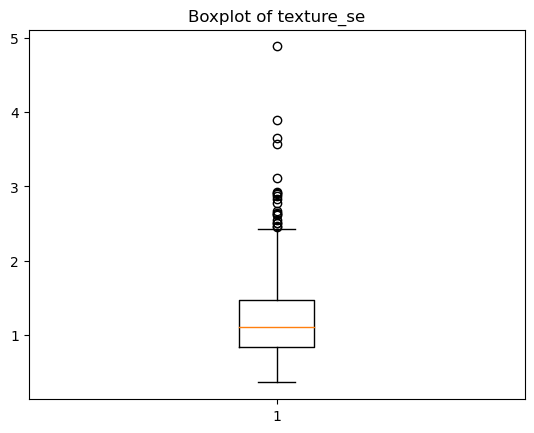

In [347]:
# Boxplot of 'texture_se'  column to check outliers
plt.boxplot(data['texture_se'])

# display title
plt.title("Boxplot of texture_se")

# display figures
plt.show()

In [348]:
# First Quartile of 'texture_se' column
Q1_ts = np.percentile(data['texture_se'], 25, interpolation='midpoint')
# Second Quartile of 'texture_se' column
Q2_ts = np.percentile(data['texture_se'], 50, interpolation='midpoint')
# Third Quartile of 'texture_se' column
Q3_ts = np.percentile(data['texture_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'texture_se' column
IQR_ts = Q3_ts-Q1_ts
# lower whisker of 'texture_se'  column
low_ts = Q1_ts-1.5*IQR_ts 
# upper whisker of 'texture_se' column
up_ts = Q3_ts+1.5*IQR_ts

# to find the outliers  in 'texture_se' column and display it
outlier_ts = [] 
for x_ts in data['texture_se']:
    if((x_ts>up_ts) or (x_ts<low_ts)):
        outlier_ts.append(x_ts)
f"Outliers of 'texture_se' column = {outlier_ts}"

"Outliers of 'texture_se' column = [3.568, 2.91, 3.12, 2.508, 2.664, 4.885, 2.612, 2.454, 2.777, 2.509, 2.836, 2.878, 2.542, 2.643, 3.647, 2.635, 2.927, 2.904, 3.896, 2.463]"

##### 'Outliers' in 'perimeter_se' column

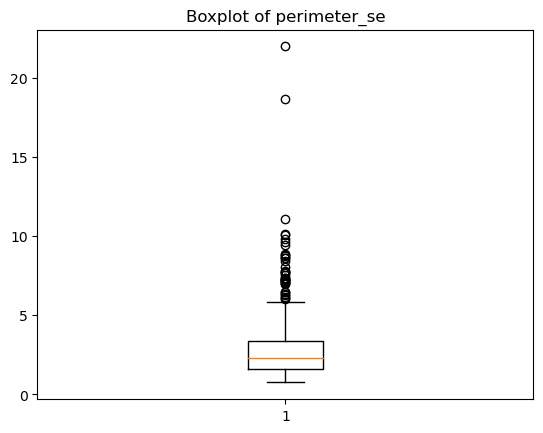

In [349]:
# Boxplot of 'perimeter_se'  column to check outliers
plt.boxplot(data['perimeter_se'])

# display title
plt.title("Boxplot of perimeter_se")

# display figures
plt.show()

In [350]:
# First Quartile of 'perimeter_se' column
Q1_ps = np.percentile(data['perimeter_se'], 25, interpolation='midpoint')
# Second Quartile of 'perimeter_se' column
Q2_ps = np.percentile(data['perimeter_se'], 50, interpolation='midpoint')
# Third Quartile of 'perimeter_se' column
Q3_ps = np.percentile(data['perimeter_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'perimeter_se' column
IQR_ps = Q3_ps-Q1_ps
# lower whisker of 'perimeter_se'  column
low_ps = Q1_ps-1.5*IQR_ps 
# upper whisker of 'perimeter_se' column
up_ps = Q3_ps+1.5*IQR_ps

# to find the outliers  in 'perimeter_se' column and display it
outlier_ps = [] 
for x_ps in data['perimeter_se']:
    if((x_ps>up_ps) or (x_ps<low_ps)):
        outlier_ps.append(x_ps)
f"Outliers of 'perimeter_se' column = {outlier_ps}"

"Outliers of 'perimeter_se' column = [8.589, 11.07, 7.276, 8.077, 8.83, 6.311, 8.649, 7.382, 10.05, 9.807, 8.419, 6.971, 7.337, 7.029, 21.98, 6.487, 7.247, 6.372, 7.158, 10.12, 6.146, 7.749, 8.867, 7.237, 7.804, 6.076, 6.462, 7.222, 7.128, 7.733, 7.561, 9.424, 6.051, 18.65, 9.635, 7.05, 8.758, 7.673]"

##### 'Outliers' in 'area_se' column

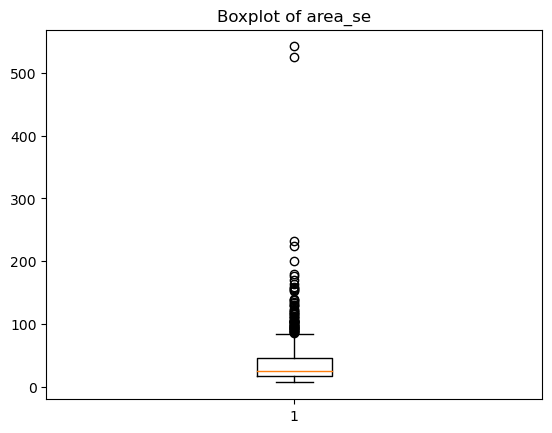

In [351]:
# Boxplot of 'area_se'  column to check outliers
plt.boxplot(data['area_se'])

# display title
plt.title("Boxplot of area_se")

# display figures
plt.show()

In [352]:
# First Quartile of 'area_se' column
Q1_as = np.percentile(data['area_se'], 25, interpolation='midpoint')
# Second Quartile of 'area_se' column
Q2_as = np.percentile(data['area_se'], 50, interpolation='midpoint')
# Third Quartile of 'area_se' column
Q3_as = np.percentile(data['area_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'area_se' column
IQR_as = Q3_as-Q1_as
# lower whisker of 'area_se'  column
low_as = Q1_as-1.5*IQR_as 
# upper whisker of 'area_se' column
up_as = Q3_as+1.5*IQR_as

# to find the outliers  in 'area_se' column and display it
outlier_as = [] 
for x_as in data['area_se']:
    if((x_as>up_as) or (x_as<low_as)):
        outlier_as.append(x_as)
f"Outliers of 'area_se' column = {outlier_as}"

"Outliers of 'area_se' column = [153.4, 94.03, 94.44, 116.2, 112.4, 93.99, 102.6, 111.4, 93.54, 105.0, 106.0, 104.9, 98.81, 102.5, 96.05, 134.8, 116.4, 120.0, 87.87, 170.0, 90.47, 233.0, 101.9, 93.91, 119.3, 97.07, 97.85, 122.3, 128.7, 111.7, 525.6, 124.4, 109.9, 155.8, 137.9, 92.81, 106.4, 138.5, 90.94, 199.7, 156.8, 133.0, 130.8, 87.17, 88.25, 164.1, 153.1, 103.6, 224.1, 130.2, 176.5, 103.9, 115.2, 542.2, 104.9, 89.74, 95.77, 180.2, 139.9, 100.4, 87.78, 118.8, 158.7, 99.04, 86.22]"

##### 'Outliers' in 'smoothness_se'  column

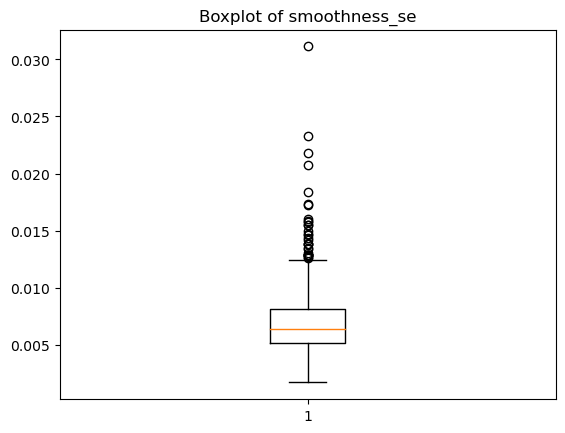

In [353]:
# Boxplot of 'smoothness_se'  column to check outliers
plt.boxplot(data['smoothness_se'])

# display title
plt.title("Boxplot of smoothness_se")

# display figures
plt.show()

In [354]:
# First Quartile of 'smoothness_se' column
Q1_ss = np.percentile(data['smoothness_se'], 25, interpolation='midpoint')
# Second Quartile of 'smoothness_se' column
Q2_ss = np.percentile(data['smoothness_se'], 50, interpolation='midpoint')
# Third Quartile of 'smoothness_se' column
Q3_ss = np.percentile(data['smoothness_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'smoothness_se' column
IQR_ss = Q3_ss-Q1_ss
# lower whisker of 'smoothness_se'  column
low_ss = Q1_ss-1.5*IQR_ss 
# upper whisker of 'smoothness_se' column
up_ss = Q3_ss+1.5*IQR_ss

# to find the outliers  in 'smoothness_se' column and display it
outlier_ss = [] 
for x_ss in data['smoothness_se']:
    if((x_ss>up_ss) or (x_ss<low_ss)):
        outlier_ss.append(x_ss)
f"Outliers of 'smoothness_se' column = {outlier_ss}"

"Outliers of 'smoothness_se' column = [0.01721, 0.0134, 0.01385, 0.01291, 0.01835, 0.02333, 0.01496, 0.01286, 0.01439, 0.0138, 0.01345, 0.03113, 0.01604, 0.0138, 0.01418, 0.01574, 0.02075, 0.01289, 0.01736, 0.01582, 0.01474, 0.01307, 0.01459, 0.02177, 0.01262, 0.01546, 0.01288, 0.01266, 0.01547, 0.01291]"

##### 'Outliers' in 'compactness_se' column

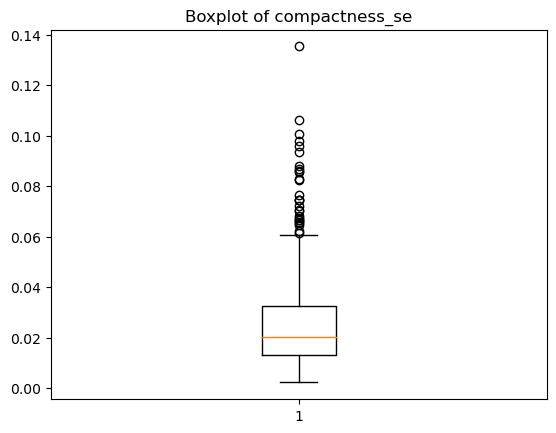

In [355]:
# Boxplot of 'compactness_se'  column to check outliers
plt.boxplot(data['compactness_se'])

# display title
plt.title("Boxplot of compactness_se")

# display figures
plt.show()

In [356]:
# First Quartile of 'compactness_se' column
Q1_cs = np.percentile(data['compactness_se'], 25, interpolation='midpoint')
# Second Quartile of 'compactness_se' column
Q2_cs = np.percentile(data['compactness_se'], 50, interpolation='midpoint')
# Third Quartile of 'compactness_se' column
Q3_cs = np.percentile(data['compactness_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'compactness_se' column
IQR_cs = Q3_cs-Q1_cs
# lower whisker of 'compactness_se'  column
low_cs = Q1_cs-1.5*IQR_cs 
# upper whisker of 'compactness_se' column
up_cs = Q3_cs+1.5*IQR_cs

# to find the outliers  in 'compactness_se' column and display it
outlier_cs = [] 
for x_cs in data['compactness_se']:
    if((x_cs>up_cs) or (x_cs<low_cs)):
        outlier_cs.append(x_cs)
f"Outliers of 'compactness_se' column = {outlier_cs}"

"Outliers of 'compactness_se' column = [0.07458, 0.07217, 0.08297, 0.1006, 0.07056, 0.08606, 0.09368, 0.06835, 0.08668, 0.07446, 0.0676, 0.09806, 0.09586, 0.08808, 0.1354, 0.08555, 0.08262, 0.1064, 0.0659, 0.06559, 0.07643, 0.06669, 0.06213, 0.06657, 0.07025, 0.07471, 0.06457, 0.06158]"

##### 'Outliers' in 'concavity_se' column

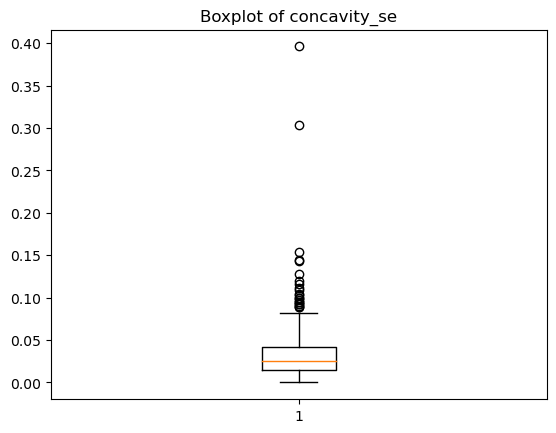

In [357]:
# Boxplot of 'concavity_se'  column to check outliers
plt.boxplot(data['concavity_se'])

# display title
plt.title("Boxplot of concavity_se")

# display figures
plt.show()

In [358]:
# First Quartile of 'concavity_se' column
Q1_cse = np.percentile(data['concavity_se'], 25, interpolation='midpoint')
# Second Quartile of 'concavity_se' column
Q2_cse = np.percentile(data['concavity_se'], 50, interpolation='midpoint')
# Third Quartile of 'concavity_se' column
Q3_cse = np.percentile(data['concavity_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'concavity_se' column
IQR_cse = Q3_cse-Q1_cse
# lower whisker of 'concavity_se'  column
low_cse = Q1_cse-1.5*IQR_cse 
# upper whisker of 'concavity_se' column
up_cse = Q3_cse+1.5*IQR_cse

# to find the outliers  in 'concavity_se' column and display it
outlier_cse = [] 
for x_cse in data['concavity_se']:
    if((x_cse>up_cse) or (x_cse<low_cse)):
        outlier_cse.append(x_cse)
f"Outliers of 'concavity_se' column = {outlier_cse}"

"Outliers of 'concavity_se' column = [0.0889, 0.09723, 0.3038, 0.1091, 0.104, 0.1435, 0.09263, 0.1278, 0.396, 0.1197, 0.1166, 0.08958, 0.1438, 0.0888, 0.09518, 0.0996, 0.1027, 0.09953, 0.1535, 0.09472, 0.1114, 0.09252]"

##### 'Outliers' in 'concave points_se' column

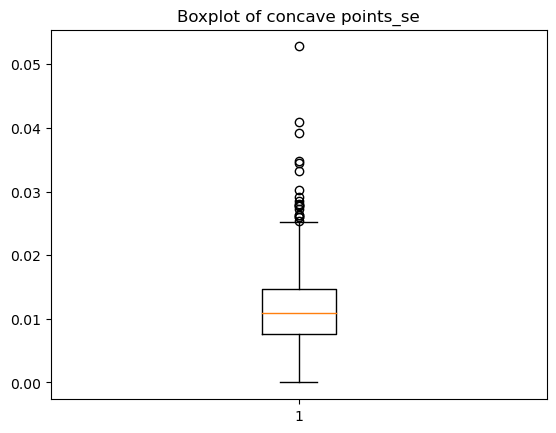

In [359]:
# Boxplot of 'concave points_se'  column to check outliers
plt.boxplot(data['concave points_se'])

# display title
plt.title("Boxplot of concave points_se")

# display figures
plt.show()

In [360]:
# First Quartile of 'concave points_se' column
Q1_cps = np.percentile(data['concave points_se'], 25, interpolation='midpoint')
# Second Quartile of 'concave points_se' column
Q2_cps = np.percentile(data['concave points_se'], 50, interpolation='midpoint')
# Third Quartile of 'concave points_se' column
Q3_cps = np.percentile(data['concave points_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'concave points_se' column
IQR_cps = Q3_cps-Q1_cps
# lower whisker of 'concave points_se'  column
low_cps = Q1_cps-1.5*IQR_cps 
# upper whisker of 'concave points_se' column
up_cps = Q3_cps+1.5*IQR_cps

# to find the outliers  in 'concave points_se' column and display it
outlier_cps = [] 
for x_cps in data['concave points_se']:
    if((x_cps>up_cps) or (x_cps<low_cps)):
        outlier_cps.append(x_cps)
f"Outliers of 'concave points_se' column = {outlier_cps}"

"Outliers of 'concave points_se' column = [0.0409, 0.02638, 0.03322, 0.02593, 0.02801, 0.05279, 0.02794, 0.02765, 0.03927, 0.03024, 0.03487, 0.02771, 0.02536, 0.02919, 0.03441, 0.02598, 0.02721, 0.02853, 0.02624]"

##### 'Outliers' in 'symmetry_se'  column

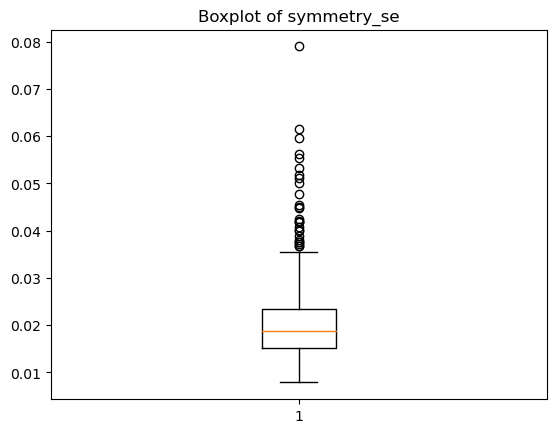

In [361]:
# Boxplot of 'symmetry_se'  column to check outliers
plt.boxplot(data['symmetry_se'])

# display title
plt.title("Boxplot of symmetry_se")

# display figures
plt.show()

In [362]:
# First Quartile of 'symmetry_se' column
Q1_ss1 = np.percentile(data['symmetry_se'], 25, interpolation='midpoint')
# Second Quartile of 'symmetry_se' column
Q2_ss1 = np.percentile(data['symmetry_se'], 50, interpolation='midpoint')
# Third Quartile of 'symmetry_se' column
Q3_ss1 = np.percentile(data['symmetry_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'symmetry_se' column
IQR_ss1 = Q3_ss1-Q1_ss1
# lower whisker of 'symmetry_se'  column
low_ss1 = Q1_ss1-1.5*IQR_ss1 
# upper whisker of 'symmetry_se' column
up_ss1 = Q3_ss1+1.5*IQR_ss1

# to find the outliers  in 'symmetry_se' column and display it
outlier_ss1 = [] 
for x_ss1 in data['symmetry_se']:
    if((x_ss1>up_ss1) or (x_ss1<low_ss1)):
        outlier_ss1.append(x_ss1)
f"Outliers of 'symmetry_se' column = {outlier_ss1}"

"Outliers of 'symmetry_se' column = [0.05963, 0.04484, 0.03672, 0.05333, 0.04183, 0.04192, 0.04197, 0.07895, 0.05014, 0.04547, 0.05168, 0.05628, 0.0388, 0.05113, 0.03799, 0.04783, 0.04499, 0.04077, 0.06146, 0.04022, 0.04243, 0.03756, 0.03675, 0.05543, 0.0371, 0.03997, 0.03759]"

##### 'Outliers' in 'fractal_dimension_se' column

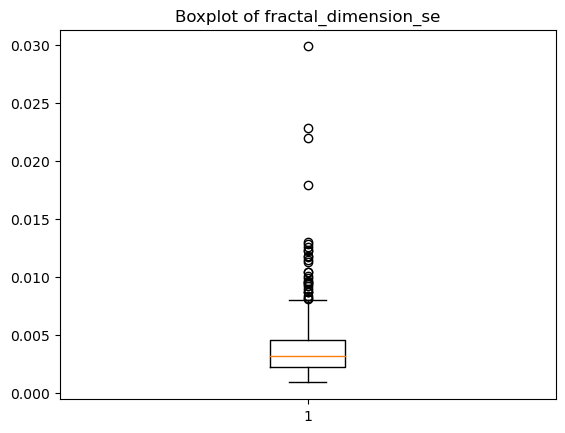

In [363]:
# Boxplot of 'fractal_dimension_se'  column to check outliers
plt.boxplot(data['fractal_dimension_se'])

# display title
plt.title("Boxplot of fractal_dimension_se")

# display figures
plt.show()

In [364]:
# First Quartile of 'fractal_dimension_se' column
Q1_fds = np.percentile(data['fractal_dimension_se'], 25, interpolation='midpoint')
# Second Quartile of 'fractal_dimension_se' column
Q2_fds = np.percentile(data['fractal_dimension_se'], 50, interpolation='midpoint')
# Third Quartile of 'fractal_dimension_se' column
Q3_fds = np.percentile(data['fractal_dimension_se'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'fractal_dimension_se' column
IQR_fds = Q3_fds-Q1_fds
# lower whisker of 'fractal_dimension_se'  column
low_fds = Q1_fds-1.5*IQR_fds 
# upper whisker of 'fractal_dimension_se' column
up_fds = Q3_fds+1.5*IQR_fds

# to find the outliers  in 'fractal_dimension_se' column and display it
outlier_fds = [] 
for x_fds in data['fractal_dimension_se']:
    if((x_fds>up_fds) or (x_fds<low_fds)):
        outlier_fds.append(x_fds)
f"Outliers of 'fractal_dimension_se' column = {outlier_fds}"

"Outliers of 'fractal_dimension_se' column = [0.009208, 0.01008, 0.01284, 0.008093, 0.009559, 0.02193, 0.01039, 0.01298, 0.009875, 0.009423, 0.009368, 0.01178, 0.02984, 0.01792, 0.01172, 0.01256, 0.008675, 0.00866, 0.02286, 0.0122, 0.01233, 0.008925, 0.008133, 0.0113, 0.009627, 0.01045, 0.01148, 0.008313]"

##### 'Outliers' in 'radius_worst' column

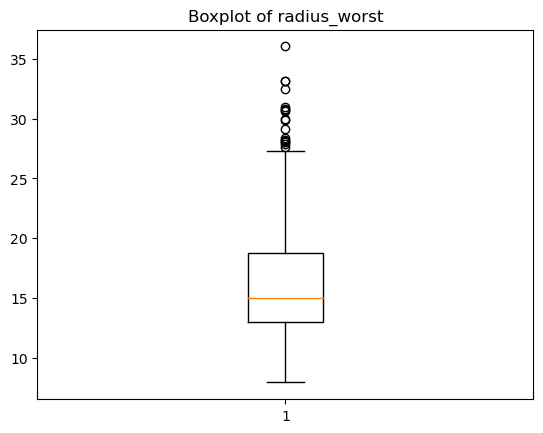

In [365]:
# Boxplot of 'radius_worst'  column to check outliers
plt.boxplot(data['radius_worst'])

# display title
plt.title("Boxplot of radius_worst")

# display figures
plt.show()

In [366]:
# First Quartile of 'radius_worst' column
Q1_rw = np.percentile(data['radius_worst'], 25, interpolation='midpoint')
# Second Quartile of 'radius_worst' column
Q2_rw = np.percentile(data['radius_worst'], 50, interpolation='midpoint')
# Third Quartile of 'radius_worst' column
Q3_rw = np.percentile(data['radius_worst'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'radius_worst' column
IQR_rw = Q3_rw-Q1_rw
# lower whisker of 'radius_worst'  column
low_rw = Q1_rw-1.5*IQR_rw 
# upper whisker of 'radius_worst' column
up_rw = Q3_rw+1.5*IQR_rw

# to find the outliers  in 'radius_worst' column and display it
outlier_rw = [] 
for x_rw in data['radius_worst']:
    if((x_rw>up_rw) or (x_rw<low_rw)):
        outlier_rw.append(x_rw)
f"Outliers of 'radius_worst' column = {outlier_rw}"

"Outliers of 'radius_worst' column = [29.17, 30.0, 28.4, 28.01, 33.12, 28.11, 27.9, 31.01, 32.49, 28.19, 30.67, 33.13, 30.75, 27.66, 36.04, 30.79, 29.92]"

##### 'Outliers' in 'texture_worst'  column

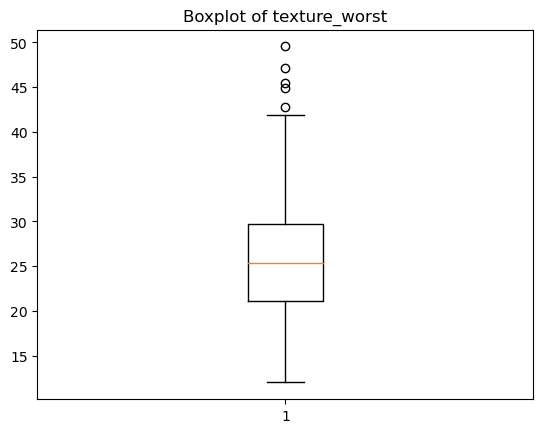

In [367]:
# Boxplot of 'texture_worst'  column to check outliers
plt.boxplot(data['texture_worst'])

# display title
plt.title("Boxplot of texture_worst")

# display figures
plt.show()

In [368]:
# First Quartile of 'texture_worst' column
Q1_tw = np.percentile(data['texture_worst'], 25, interpolation='midpoint')
# Second Quartile of 'texture_worst' column
Q2_tw = np.percentile(data['texture_worst'], 50, interpolation='midpoint')
# Third Quartile of 'texture_worst' column
Q3_tw = np.percentile(data['texture_worst'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'texture_worst' column
IQR_tw = Q3_tw-Q1_tw
# lower whisker of 'texture_worst'  column
low_tw = Q1_tw-1.5*IQR_tw 
# upper whisker of 'texture_worst' column
up_tw = Q3_tw+1.5*IQR_tw

# to find the outliers  in 'texture_worst' column and display it
outlier_tw = [] 
for x_tw in data['texture_worst']:
    if((x_tw>up_tw) or (x_tw<low_tw)):
        outlier_tw.append(x_tw)
f"Outliers of 'texture_worst' column = {outlier_tw}"

"Outliers of 'texture_worst' column = [45.41, 44.87, 49.54, 47.16, 42.79]"

##### 'Outliers' in 'perimeter_worst' column

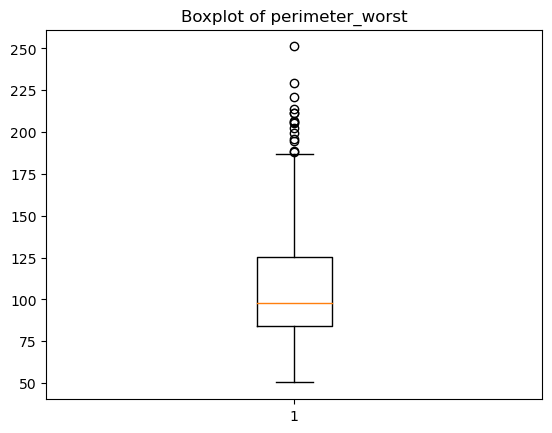

In [369]:
# Boxplot of 'perimeter_worst'  column to check outliers
plt.boxplot(data['perimeter_worst'])

# display title
plt.title("Boxplot of perimeter_worst")

# display figures
plt.show()

In [370]:
# First Quartile of 'perimeter_worst' column
Q1_pw = np.percentile(data['perimeter_worst'], 25, interpolation='midpoint')
# Second Quartile of 'perimeter_worst' column
Q2_pw = np.percentile(data['perimeter_worst'], 50, interpolation='midpoint')
# Third Quartile of 'perimeter_worst' column
Q3_pw = np.percentile(data['perimeter_worst'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'perimeter_worst' column
IQR_pw = Q3_pw-Q1_pw
# lower whisker of 'perimeter_worst'  column
low_pw = Q1_pw-1.5*IQR_pw 
# upper whisker of 'perimeter_worst' column
up_pw = Q3_pw+1.5*IQR_pw

# to find the outliers  in 'perimeter_worst' column and display it
outlier_pw = [] 
for x_pw in data['perimeter_worst']:
    if((x_pw>up_pw) or (x_pw<low_pw)):
        outlier_pw.append(x_pw)
f"Outliers of 'perimeter_worst' column = {outlier_pw}"

"Outliers of 'perimeter_worst' column = [188.0, 211.7, 206.8, 220.8, 188.5, 206.0, 214.0, 195.9, 202.4, 229.3, 199.5, 195.0, 251.2, 211.5, 205.7]"

##### 'Outliers' in 'area_worst' column

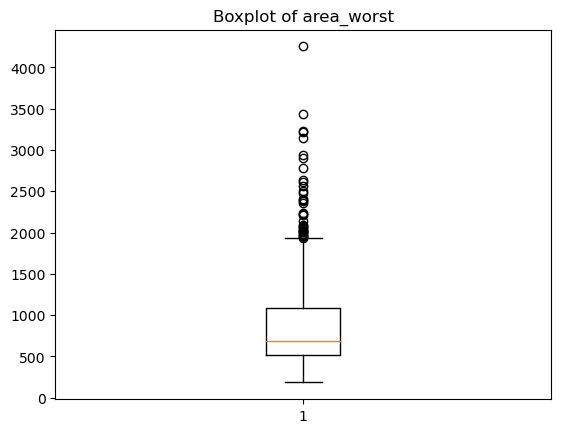

In [371]:
# Boxplot of 'area_worst'  column to check outliers
plt.boxplot(data['area_worst'])

# display title
plt.title("Boxplot of area_worst")

# display figures
plt.show()

In [372]:
# First Quartile of 'area_worst' column
Q1_aw = np.percentile(data['area_worst'], 25, interpolation='midpoint')
# Second Quartile of 'area_worst' column
Q2_aw = np.percentile(data['area_worst'], 50, interpolation='midpoint')
# Third Quartile of 'area_worst' column
Q3_aw = np.percentile(data['area_worst'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'area_worst' column
IQR_aw = Q3_aw-Q1_aw
# lower whisker of 'area_worst'  column
low_aw = Q1_aw-1.5*IQR_aw 
# upper whisker of 'area_worst' column
up_aw = Q3_aw+1.5*IQR_aw

# to find the outliers  in 'area_worst' column and display it
outlier_aw = [] 
for x_aw in data['area_worst']:
    if((x_aw>up_aw) or (x_aw<low_aw)):
        outlier_aw.append(x_aw)
f"Outliers of 'area_worst' column = {outlier_aw}"

"Outliers of 'area_worst' column = [2019.0, 1956.0, 2398.0, 2615.0, 2215.0, 2145.0, 2562.0, 2360.0, 2073.0, 2232.0, 2403.0, 3216.0, 2089.0, 1986.0, 2499.0, 2009.0, 2477.0, 2944.0, 2010.0, 1972.0, 3432.0, 2384.0, 2053.0, 1938.0, 2906.0, 3234.0, 3143.0, 2227.0, 1946.0, 2081.0, 2022.0, 4254.0, 2782.0, 2642.0, 2027.0]"

##### 'Outliers' in 'smoothness_worst' column

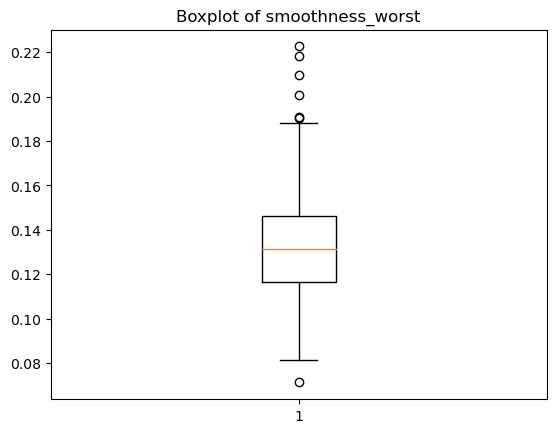

In [373]:
# Boxplot of 'smoothness_worst'  column to check outliers
plt.boxplot(data['smoothness_worst'])

# display title
plt.title("Boxplot of smoothness_worst")

# display figures
plt.show()

In [374]:
# First Quartile of 'smoothness_worst' column
Q1_sw = np.percentile(data['smoothness_worst'], 25, interpolation='midpoint')
# Second Quartile of 'smoothness_worst' column
Q2_sw = np.percentile(data['smoothness_worst'], 50, interpolation='midpoint')
# Third Quartile of 'smoothness_worst' column
Q3_sw = np.percentile(data['smoothness_worst'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'smoothness_worst' column
IQR_sw = Q3_sw-Q1_sw
# lower whisker of 'smoothness_worst'  column
low_sw = Q1_sw-1.5*IQR_sw 
# upper whisker of 'smoothness_worst' column
up_sw = Q3_sw+1.5*IQR_sw

# to find the outliers  in 'smoothness_worst' column and display it
outlier_sw = [] 
for x_sw in data['smoothness_worst']:
    if((x_sw>up_sw) or (x_sw<low_sw)):
        outlier_sw.append(x_sw)
f"Outliers of 'smoothness_worst' column = {outlier_sw}"

"Outliers of 'smoothness_worst' column = [0.2098, 0.1909, 0.07117, 0.2226, 0.2184, 0.1902, 0.2006]"

##### 'Outliers' in 'compactness_worst' column

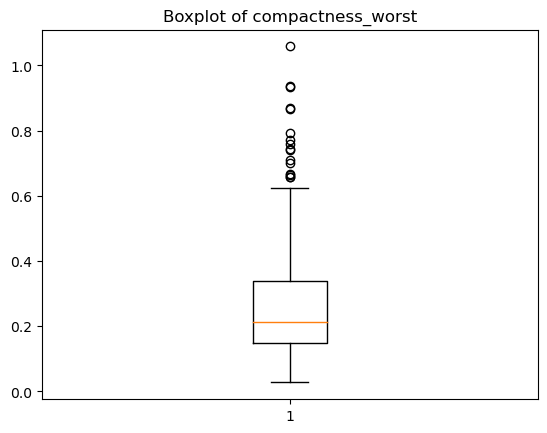

In [375]:
# Boxplot of 'compactness_worst'  column to check outliers
plt.boxplot(data['compactness_worst'])

# display title
plt.title("Boxplot of compactness_worst")

# display figures
plt.show()

In [376]:
# First Quartile of 'compactness_worst' column
Q1_cw = np.percentile(data['compactness_worst'], 25, interpolation='midpoint')
# Second Quartile of 'compactness_worst' column
Q2_cw = np.percentile(data['compactness_worst'], 50, interpolation='midpoint')
# Third Quartile of 'compactness_worst' column
Q3_cw = np.percentile(data['compactness_worst'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'compactness_worst' column
IQR_cw = Q3_cw-Q1_cw
# lower whisker of 'compactness_worst'  column
low_cw = Q1_cw-1.5*IQR_cw 
# upper whisker of 'compactness_worst' column
up_cw = Q3_cw+1.5*IQR_cw

# to find the outliers  in 'compactness_worst' column and display it
outlier_cw = [] 
for x_cw in data['compactness_worst']:
    if((x_cw>up_cw) or (x_cw<low_cw)):
        outlier_cw.append(x_cw)
f"Outliers of 'compactness_worst' column = {outlier_cw}"

"Outliers of 'compactness_worst' column = [0.6656, 0.8663, 1.058, 0.7725, 0.6577, 0.6643, 0.659, 0.7444, 0.7394, 0.6997, 0.7584, 0.9327, 0.9379, 0.709, 0.7917, 0.8681]"

##### 'Outliers' in 'concavity_worst' column

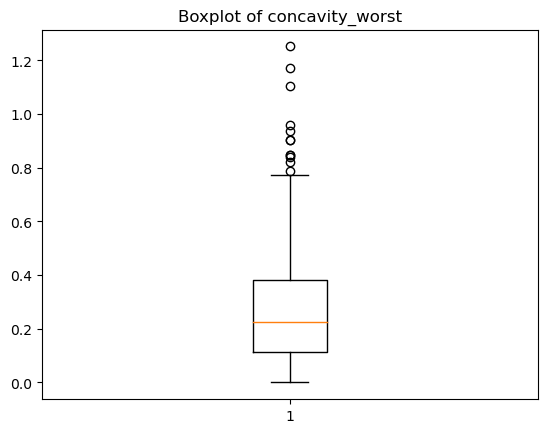

In [377]:
# Boxplot of 'concavity_worst'  column to check outliers
plt.boxplot(data['concavity_worst'])

# display title
plt.title("Boxplot of concavity_worst")

# display figures
plt.show()

In [378]:
# First Quartile of 'concavity_worst' column
Q1_cnw = np.percentile(data['concavity_worst'], 25, interpolation='midpoint')
# Second Quartile of 'concavity_worst' column
Q2_cnw = np.percentile(data['concavity_worst'], 50, interpolation='midpoint')
# Third Quartile of 'concavity_worst' column
Q3_cnw = np.percentile(data['concavity_worst'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'concavity_worst' column
IQR_cnw = Q3_cnw-Q1_cnw
# lower whisker of 'concavity_worst'  column
low_cnw = Q1_cnw-1.5*IQR_cnw 
# upper whisker of 'concavity_worst' column
up_cnw = Q3_cnw+1.5*IQR_cnw

# to find the outliers  in 'concavity_worst' column and display it
outlier_cnw = [] 
for x_cnw in data['concavity_worst']:
    if((x_cnw>up_cnw) or (x_cnw<low_cnw)):
        outlier_cnw.append(x_cnw)
f"Outliers of 'concavity_worst' column = {outlier_cnw}"

"Outliers of 'concavity_worst' column = [1.105, 1.252, 0.9608, 0.8216, 0.8488, 0.7892, 0.8489, 0.8402, 0.9034, 0.9019, 1.17, 0.9387]"

##### 'Outliers' in 'concave points_worst' column

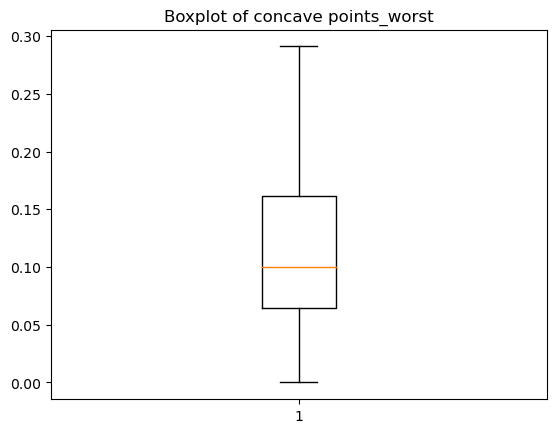

In [379]:
# Boxplot of 'concave points_worst'  column to check outliers
plt.boxplot(data['concave points_worst'])

# display title
plt.title("Boxplot of concave points_worst")

# display figures
plt.show()

~ no outliers present in 'concave points_worst'  column 

##### 'Outliers' in 'symmetry_worst' column

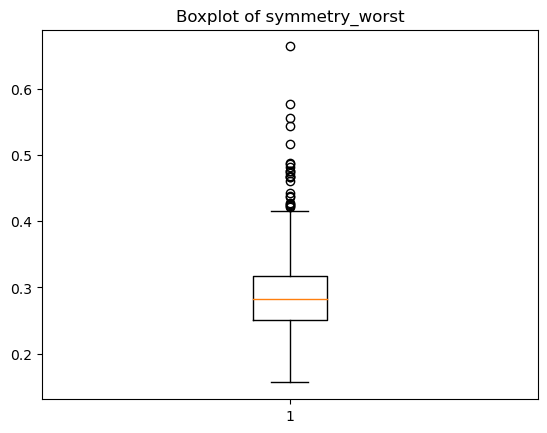

In [380]:
# Boxplot of 'symmetry_worst'  column to check outliers
plt.boxplot(data['symmetry_worst'])

# display title
plt.title("Boxplot of symmetry_worst")

# display figures
plt.show()

In [381]:
# First Quartile of 'symmetry_worst' column
Q1_syw = np.percentile(data['symmetry_worst'], 25, interpolation='midpoint')
# Second Quartile of 'symmetry_worst' column
Q2_syw = np.percentile(data['symmetry_worst'], 50, interpolation='midpoint')
# Third Quartile of 'symmetry_worst' column
Q3_syw = np.percentile(data['symmetry_worst'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'symmetry_worst' column
IQR_syw = Q3_syw-Q1_syw
# lower whisker of 'symmetry_worst'  column
low_syw = Q1_syw-1.5*IQR_syw 
# upper whisker of 'symmetry_worst' column
up_syw = Q3_syw+1.5*IQR_syw

# to find the outliers  in 'symmetry_worst' column and display it
outlier_syw = [] 
for x_syw in data['symmetry_worst']:
    if((x_syw>up_syw) or (x_syw<low_syw)):
        outlier_syw.append(x_syw)
f"Outliers of 'symmetry_worst' column = {outlier_syw}"

"Outliers of 'symmetry_worst' column = [0.4601, 0.6638, 0.4378, 0.4366, 0.4218, 0.4667, 0.4264, 0.4761, 0.427, 0.4863, 0.467, 0.4228, 0.544, 0.4882, 0.5774, 0.5166, 0.4753, 0.4432, 0.4724, 0.5558, 0.4245, 0.4824, 0.4677]"

##### 'Outliers' in 'fractal_dimension_worst' column

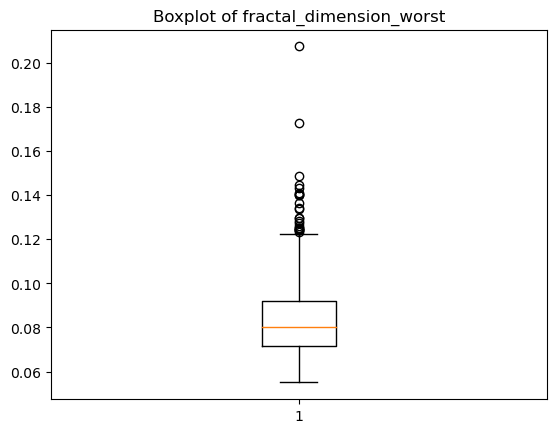

In [382]:
# Boxplot of 'fractal_dimension_worst'  column to check outliers
plt.boxplot(data['fractal_dimension_worst'])

# display title
plt.title("Boxplot of fractal_dimension_worst")

# display figures
plt.show()

In [383]:
# First Quartile of 'fractal_dimension_worst' column
Q1_fdw = np.percentile(data['fractal_dimension_worst'], 25, interpolation='midpoint')
# Second Quartile of 'fractal_dimension_worst' column
Q2_fdw = np.percentile(data['fractal_dimension_worst'], 50, interpolation='midpoint')
# Third Quartile of 'fractal_dimension_worst' column
Q3_fdw = np.percentile(data['fractal_dimension_worst'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'fractal_dimension_worst' column
IQR_fdw = Q3_fdw-Q1_fdw
# lower whisker of 'fractal_dimension_worst'  column
low_fdw = Q1_fdw-1.5*IQR_fdw 
# upper whisker of 'fractal_dimension_worst' column
up_fdw = Q3_fdw+1.5*IQR_fdw

# to find the outliers  in 'fractal_dimension_worst' column and display it
outlier_fdw = [] 
for x_fdw in data['fractal_dimension_worst']:
    if((x_fdw>up_fdw) or (x_fdw<low_fdw)):
        outlier_fdw.append(x_fdw)
f"Outliers of 'fractal_dimension_worst' column = {outlier_fdw}"

"Outliers of 'fractal_dimension_worst' column = [0.173, 0.1244, 0.2075, 0.1431, 0.1341, 0.1275, 0.1402, 0.1233, 0.1339, 0.1405, 0.1252, 0.1486, 0.1259, 0.1284, 0.1446, 0.1243, 0.1297, 0.1297, 0.1403, 0.1249, 0.1252, 0.1364, 0.1409, 0.124]"

### CORRELATION

In [384]:
# selecting  numerical variables for doing correlation
P = data.drop(['diagnosis'], axis = 1)

In [385]:
# creating an instance for correlation
corrmatrix = P.corr()

# displaying the values of 'corrmatrix'
corrmatrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### ENCODING 

encoding 'diagnosis' column

In [386]:
# unique values present in 'diagnosis' column
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

performing label encoding on 'diagnosis' column

In [387]:
# creating an instance of LabelEncoder()
le = LabelEncoder() 

In [388]:
# applying label encoder to 'diagnosis' column and dispaying it
data['diagnosis'] = le.fit_transform(data['diagnosis'])
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

### SCALING

In [389]:
# display the summary statistics of all numerical columns
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [390]:
# preparing the dataframe to perform min max scaling and dropping the categorical column
S = data.drop(['diagnosis'], axis = 1) 

# display first 5 values under the dataframe S
S.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [391]:
# display column names
S.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [392]:
# creating an instance for MinMaxScaler() and defining the range between 0 and 1 using feature_range
minmax = MinMaxScaler(feature_range=(0,1)) 

In [393]:
# Fit MinMaxScaler and tranform the scaled values to 'S1'
S1 = minmax.fit_transform(S)

# display the values of S1
S1

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [394]:
# converting back to a dataframe since it is array format and displaying it
S1 = pd.DataFrame(S1, columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])
S1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [395]:
# display the summary statistics of all numerical columns after applying scaling
S1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### SPLITTING THE DATA INTO FEATURES AND TARGET

-X indicates Fatures  = 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst' columns


-y indicates Target = 'diagnosis' column

In [396]:
# displaying features
X = S1
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [397]:
# display the target
y = data['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

### SPLITTING THE DATA INTO TESTING & TRAINING

In [398]:
#  splitting the dataset into testing and training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### MODELS

#### 1) LOGISTIC REGRESSION

In [399]:
# creating an instance for LogisticRegression()
log_reg = LogisticRegression()

In [400]:
# fit the training data to the instance of LogisticRegression() and create a model
log_model = log_reg.fit(X_train, y_train)

In [401]:
# predict the target of the test data using the features of test data
log_ypred = log_model.predict(X_test)
log_ypred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [402]:
# displaying confusion matrix
print(confusion_matrix(y_test, log_ypred))

[[89  0]
 [ 2 52]]


In [403]:
# accuracy score
print(accuracy_score(y_test, log_ypred))

0.986013986013986


In [404]:
# precision score
print(precision_score(y_test, log_ypred))

1.0


In [405]:
# recall score
print(recall_score(y_test, log_ypred))

0.9629629629629629


#### 2) kNN MODEL

In [406]:
neighbors = np.arange(3,24) # take values from 3 to 23 and stores in array format
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23])

In [407]:
# create an empty list to store accuracy
metric_k = [] 

# take values from 3 to 23 and store it in array format in 'neighbors' variable
neighbors = np.arange(3,24) 

# creating a loop for k and varying the values of k from 3 to 23
for k in neighbors:
    
    # for the first iteration k value = 3,  creating an instance
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # fitting the training data to the model and creating a model using the iteration
    knn_model = knn.fit(X_train, y_train) 
    
    # finding the predicted values of test data using features of test data for all iterations
    y_pred_knn = knn_model.predict(X_test) 
    
    # calculating accuracy of all iterations and storing in variable 
    knn_acc = accuracy_score(y_test, y_pred_knn) 
    
    # appending accuracy  of all iterations to the empty list 
    metric_k.append(knn_acc) 


E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [408]:
# displaying accuracy values for k = 3 to 23
metric_k

[0.972027972027972,
 0.9790209790209791,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.972027972027972,
 0.958041958041958,
 0.965034965034965,
 0.958041958041958,
 0.958041958041958,
 0.965034965034965]

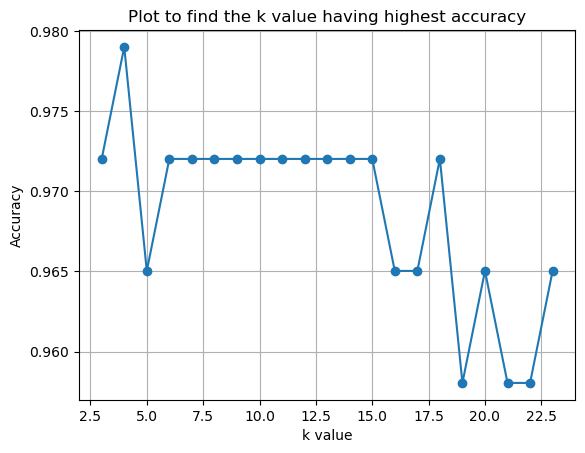

In [409]:
# plot k values versus accuracy to find out which value of k is having highest accuracy
plt.plot(neighbors, metric_k, 'o-') 

# display title
plt.title('Plot to find the k value having highest accuracy')

# plot label on x-axis
plt.xlabel('k value')

# plot label on y-axis
plt.ylabel('Accuracy')

# display grid
plt.grid()

~from the above display, highest accuracy of 0.9790209790209791, is found for k values = 4

In [410]:
# using k value = 4, creating an instance
knn = KNeighborsClassifier(n_neighbors=4) 

# creating model with training data
knn_model = knn.fit(X_train, y_train) 

# finding the predicted values of test data using features of test data
y_pred_knn = knn_model.predict(X_test) 

E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [411]:
# display confusion matrix
print(confusion_matrix(y_test, y_pred_knn))

# display accuracy score
print(accuracy_score(y_test, y_pred_knn))

[[88  1]
 [ 2 52]]
0.9790209790209791


In [412]:
# precision score
print(precision_score(y_test, y_pred_knn))

0.9811320754716981


In [413]:
# recall score
print(recall_score(y_test, y_pred_knn))

0.9629629629629629


#### 3) SVM MODEL

##### (a) 'linear' kernel

In [414]:
# creating an instance for SVM using linear kernel
svm_lin = SVC(kernel = 'linear') 

In [415]:
# creating model using training data
svm_linmod = svm_lin.fit(X_train, y_train) 

In [416]:
# predict the target of the test data using the features of test data
y_pred_svmlin = svm_lin.predict(X_test) 

In [417]:
# display confusion matrix
confusion_matrix(y_test, y_pred_svmlin)

array([[89,  0],
       [ 2, 52]], dtype=int64)

In [418]:
# display accuracy score
accuracy_score(y_test, y_pred_svmlin)

0.986013986013986

In [419]:
# precision score
print(precision_score(y_test, y_pred_svmlin))

1.0


In [420]:
# recall score
print(recall_score(y_test, y_pred_svmlin))

0.9629629629629629


##### (b) 'rbf' kernel

In [421]:
 # creating an instance for SVM  using rbf kernel
svm_rbf = SVC(kernel = 'rbf') 

In [422]:
# creating model using training data
svm_rbfmod = svm_rbf.fit(X_train, y_train) 

In [423]:
# predict the target of the test data using the features of test data
y_pred_svmrbf = svm_rbf.predict(X_test)

In [424]:
# display confusion matrix
confusion_matrix(y_test, y_pred_svmrbf)

array([[88,  1],
       [ 2, 52]], dtype=int64)

In [425]:
# display accuracy score
accuracy_score(y_test, y_pred_svmrbf)

0.9790209790209791

In [426]:
# precision score
print(precision_score(y_test, y_pred_svmrbf))

0.9811320754716981


In [427]:
# recall score
print(recall_score(y_test, y_pred_svmrbf))

0.9629629629629629


##### (c) 'polynomial' kernel

In [428]:
# creating an instance for SVM  using 'polynomial' kernel
svm_poly = SVC(kernel='poly') 

In [429]:
# creating model using training data
svm_polmod = svm_poly.fit(X_train, y_train) 

In [430]:
# predict the target of the test data using the features of test data
y_pred_svmpol = svm_poly.predict(X_test)

In [431]:
# display confusion matrix
confusion_matrix(y_test, y_pred_svmpol)

array([[88,  1],
       [ 2, 52]], dtype=int64)

In [432]:
# display accuracy score
accuracy_score(y_test, y_pred_svmpol)

0.9790209790209791

In [433]:
# precision score
print(precision_score(y_test, y_pred_svmpol))

0.9811320754716981


In [434]:
# recall score
print(recall_score(y_test, y_pred_svmpol))

0.9629629629629629


#### 4) DECISION TREE

In [435]:
# creating an instance for decision tree classifier
dec_tree = DecisionTreeClassifier(random_state=42) 

In [436]:
# creating model using training data 
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [437]:
# predict the target of the test data using the features of test data
y_pred_dectree = dec_tree.predict (X_test)

In [438]:
# display confusion matrix
confusion_matrix(y_test, y_pred_dectree)

array([[85,  4],
       [ 3, 51]], dtype=int64)

In [439]:
# display accuracy score
accuracy_score(y_test, y_pred_dectree)

0.951048951048951

In [440]:
# precision score
print(precision_score(y_test, y_pred_dectree))

0.9272727272727272


In [441]:
# recall score
print(recall_score(y_test, y_pred_dectree))

0.9444444444444444


#### 5) RANDOM FOREST

In [442]:
# creating an instance for random forest classifier
ran_for = RandomForestClassifier(random_state=42)

In [443]:
# creating model using training data 
ran_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [444]:
# predict the target of the test data using the features of test data
y_pred_ranfor = ran_for.predict (X_test)

In [445]:
# display confusion matrix
confusion_matrix(y_test, y_pred_ranfor)

array([[87,  2],
       [ 3, 51]], dtype=int64)

In [446]:
# display accuracy score
accuracy_score(y_test, y_pred_ranfor)

0.965034965034965

In [447]:
# precision score
print(precision_score(y_test, y_pred_ranfor))

0.9622641509433962


In [448]:
# recall score
print(recall_score(y_test, y_pred_ranfor))

0.9444444444444444


ACCURACY SCORE
******
1) LOGISTIC REGRESSION - 0.986013986013986 

2) kNN MODEL - 0.9790209790209791 

3) SVM MODEL,  (a) 'linear' kernel - 0.986013986013986, 
               (b) 'rbf' kernel - 0.9790209790209791, 
               (c) 'polynomial' kernel - 0.9790209790209791 
               
4) DECISION TREE - 0.951048951048951 

5) RANDOM FOREST - 0.965034965034965 

~ Highest Acuuracy score obtained for Logistic regression model and SVM model using linear kernel